# Image Segmentation

In [32]:
import numpy as np

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [1]:
import skimage

In [30]:
coins = data.coins()
coins.shape

(303, 384)

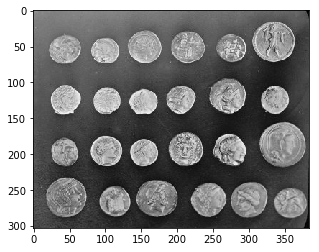

In [31]:
plt.imshow(coins, cmap='gray')

In [44]:
histogram = np.histogram(coins, bins=np.arange(0, 256))

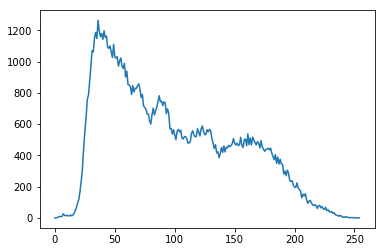

In [49]:
plt.plot(histogram[1][:-1], histogram[0])

### Otsu filter

In [50]:
from skimage import filters

In [51]:
threshold_value = filters.threshold_otsu(coins)
threshold_value

107

In [52]:
mask = coins > threshold_value

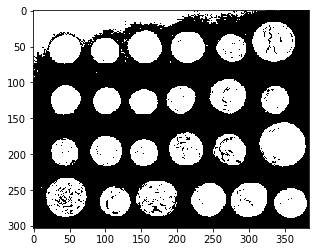

In [53]:
plt.imshow(mask, cmap='gray')

### Edge-based segmentation

In [54]:
from skimage.feature import canny

In [55]:
edges = canny(coins/255.)

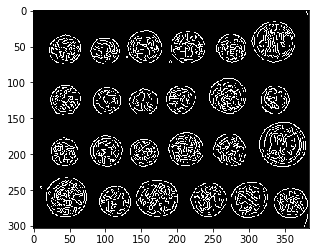

In [57]:
plt.imshow(edges, cmap='gray')

In [58]:
from scipy import ndimage as ndi

In [59]:
fill_coins = ndi.binary_fill_holes(edges)

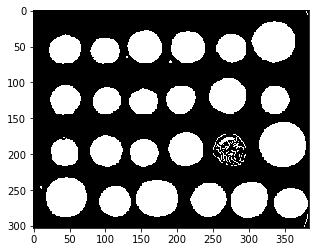

In [60]:
plt.imshow(fill_coins, cmap='gray')

In [61]:
label_objects, nb_labels = ndi.label(fill_coins)

In [62]:
sizes = np.bincount(label_objects.ravel())

In [78]:
mask_sizes = sizes > 20

In [79]:
mask_sizes[0] = 0

In [80]:
coins_cleaned = mask_sizes[label_objects]

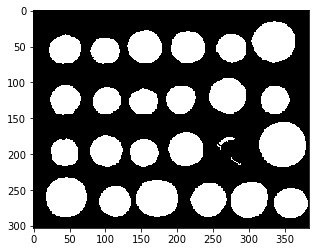

In [81]:
plt.imshow(coins_cleaned, cmap='gray')

### Region-based segmentation

In [82]:
markers = np.zeros_like(coins)

In [84]:
markers[coins < 30] = 1

In [85]:
markers[coins > 150] = 2

In [86]:
from skimage.filters import sobel

In [87]:
elevation_map = sobel(coins)

In [88]:
elevation_map.shape

(303, 384)

In [89]:
from mpl_toolkits.mplot3d import Axes3D

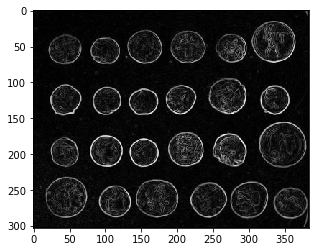

In [93]:
plt.imshow(elevation_map, cmap='gray')

In [94]:
markers = np.zeros_like(coins)

In [95]:
markers[coins < 30] = 1
markers[coins > 150] = 2

In [96]:
from skimage.morphology import watershed

In [97]:
segmentation = watershed(elevation_map, markers)

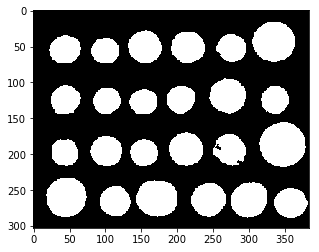

In [98]:
plt.imshow(segmentation, cmap='gray')

In [99]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

In [100]:
labeled_coins, _ = ndi.label(segmentation)

In [101]:
labeled_coins.shape

(303, 384)

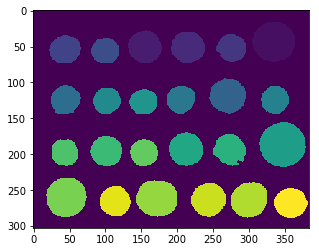

In [102]:
plt.imshow(labeled_coins)